解析解参数: [4.21509616 2.77011339]
解析解 MSE: 0.8065845639670534
梯度下降参数: [4.21509616 2.77011339]
梯度下降 MSE: 0.806584563967053


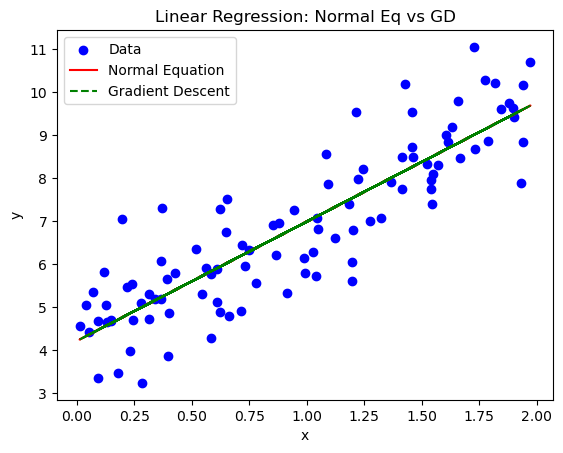

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# ===== 1. 构造数据 =====
np.random.seed(42)
X=2*np.random.rand(100,1)  # 特征 (100个样本, 1个特征)
y=4+3*X+np.random.randn(100,1)# 真实关系: y = 4 + 3x + 噪声
# 在X前面加一列1，用于偏置项 b
X_b = np.c_[np.ones((100, 1)), X]  # (100, 2)  这一行代码其实是在做 线性回归里的“偏置项 b”转化为矩阵乘法的一部分。
# ===== 2. 最小二乘 (OLS) 与 MSE =====
def mse(x_true,y_pred):
    return np.mean((x_true-y_pred)**2)  #mean为1/n,(x_true-y_pred)**2为(y_i - ŷ_i)^2  MSE(y,y^​)=n1​i=1∑n​(yi​−y^​i​)2
# ===== 3. 解析解 (Normal Equation) =====
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # θ_best = (X^T * X)^(-1) * X^T * y
print("解析解参数:", theta_best.ravel())
y_pred_closed = X_b.dot(theta_best)
print("解析解 MSE:", mse(y, y_pred_closed))
# ===== 4. 梯度下降 (Gradient Descent) =====
eta=0.1#学习率
n_iterations=1000#迭代次数
m=len(X_b)#样本数量
theta=np.random.randn(2,1)#随机初始化参数
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)  # ∇θ MSE = (2/m) * X^T * (Xθ - y)
    theta=theta-eta*gradients  # θ = θ - η * ∇θ MSE
print("梯度下降参数:", theta.ravel())
y_pred_gd = X_b.dot(theta)
print("梯度下降 MSE:", mse(y, y_pred_gd))
# ===== 5. 可视化对比 =====
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred_closed, color="red", label="Normal Equation")
plt.plot(X, y_pred_gd, color="green", linestyle="--", label="Gradient Descent")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Normal Eq vs GD")
plt.show()    

1. 最小二乘法（Ordinary Least Squares, OLS）

是干什么的？
👉 一种 拟合方法，通过最小化预测值与真实值的平方误差和，来找到最佳的回归直线。
2. MSE（均方误差, Mean Squared Error）

是干什么的？
👉 一种 损失函数/评价指标，用来衡量模型预测的好坏。
公式就是平方误差的平均值。

训练时：MSE 是优化目标（损失函数）

评估时：MSE 是评价指标（越小越好）
3. 解析解（Normal Equation, 闭式解）

是干什么的？
👉 一种 直接求解线性回归最优参数的方法。
通过矩阵运算（解方程），一次性算出最优的权重 
𝑤
w，不需要迭代。

适合 小规模数据，特点是“一步到位，快准狠”，但数据太大时算不动。
4. 梯度下降（Gradient Descent, GD）
目标：找到参数 𝜃，使得损失函数 L(θ) 最小。
原理：

“梯度” = 函数在某一点的导数向量，表示函数增长最快的方向

“下降” = 我们要往梯度的反方向走，才能让损失减少

是干什么的？
👉 一种 通用优化方法，不是线性回归专用。
它通过不断迭代更新参数，逐步靠近损失函数的最小值。

在回归中，它用来找到使 MSE 最小的参数 w
如果数据特别大，解析解算不出来，就用梯度下降慢慢“逼近答案”。

梯度下降就是一个“下山找谷底”的方法：
梯度 = 指南针，告诉你该往哪走
学习率 = 步子大小，决定你走多快
批量/随机/小批量 = 决定你每次参考多少“地形信息”